In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt     

feature_size = 5
data_size = 10000000
train_epoch = 3
batch_size = 256
lr = 1e-4

In [4]:
true_w = torch.arange(feature_size + 1, dtype=torch.float)
X = torch.randn(data_size, feature_size + 1)
X[:, 5] = 1

y = X @ true_w + torch.normal(0, 0.1, (X.shape[0],))

wstar = (X.T @ X).inverse() @ X.T @ y
print(f"wstar = {wstar}\ndiff(wstar, true_w) = {wstar - true_w}")

def loss_func(w, xb, yb):
    return ((xb @ w - yb)**2).mean() / 2

print(f"total loss of wstar = {loss_func(wstar, X, y)}\ntotal loss of true w = {loss_func(true_w, X, y)}")

wstar = tensor([-6.7849e-05,  1.0081e+00,  2.0320e+00,  3.0481e+00,  4.0640e+00,
         5.0002e+00])
diff(wstar, true_w) = tensor([-6.7849e-05,  8.0503e-03,  3.1954e-02,  4.8116e-02,  6.4017e-02,
         2.0361e-04])
total loss of wstar = 0.008749851956963539
total loss of true w = 0.004997139796614647


step = 100, loss = 38.678611755371094
step = 200, loss = 38.76982498168945
step = 300, loss = 37.508445739746094
step = 400, loss = 36.53437423706055
step = 500, loss = 35.976219177246094
step = 600, loss = 34.821876525878906
step = 700, loss = 34.742916107177734
step = 800, loss = 33.59099197387695
step = 900, loss = 33.16636276245117
step = 1000, loss = 32.225826263427734
step = 1100, loss = 31.658639907836914
step = 1200, loss = 31.4583683013916
step = 1300, loss = 30.64931869506836
step = 1400, loss = 29.9653377532959
step = 1500, loss = 29.700708389282227
step = 1600, loss = 28.65558624267578
step = 1700, loss = 28.366567611694336
step = 1800, loss = 27.48241424560547
step = 1900, loss = 26.6588134765625
step = 2000, loss = 26.679401397705078
step = 2100, loss = 26.19060707092285
step = 2200, loss = 25.201404571533203
step = 2300, loss = 24.896835327148438
step = 2400, loss = 24.36019515991211
step = 2500, loss = 24.18539047241211
step = 2600, loss = 23.748580932617188
step = 2700

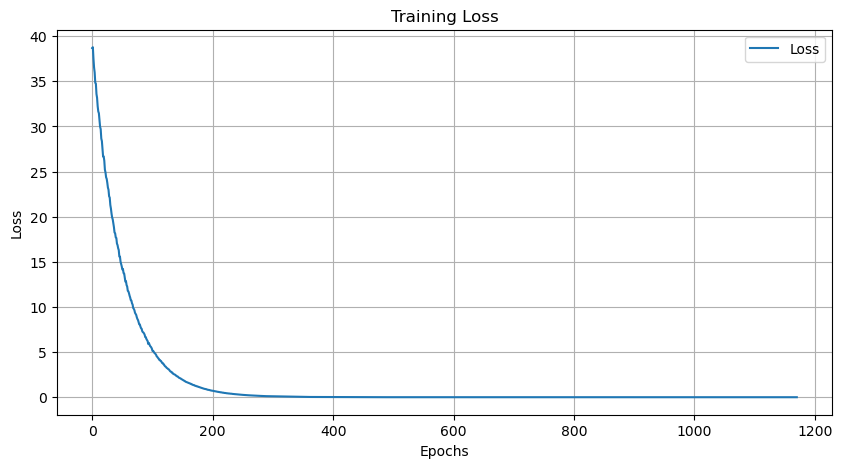

In [5]:
w = torch.randn(feature_size + 1, requires_grad=True)
report_every = 100
losses = []
cumloss = torch.zeros(1)
train_dl = DataLoader(TensorDataset(X, y), batch_size=batch_size)
step = 0

for epo in range(train_epoch):
    for xb, yb in train_dl:
        if w.grad is not None:
            w.grad.zero_()
        loss = loss_func(w, xb, yb)
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
        cumloss += loss.detach()
        step += 1
        if step % report_every == 0:
            cumloss /= report_every
            print(f"step = {step}, loss = {cumloss.item()}")
            losses.append(cumloss.item())
print(f"diff {w - wstar}, total loss {loss_func(w, X, y)}")

plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


e:\anaconda\envs\ainlp\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


step = 100, loss = 51.5472412109375
step = 200, loss = 51.62382888793945
step = 300, loss = 50.7865104675293
step = 400, loss = 49.272037506103516
step = 500, loss = 48.776065826416016
step = 600, loss = 47.60602569580078
step = 700, loss = 47.66803741455078
step = 800, loss = 46.33354949951172
step = 900, loss = 46.045257568359375
step = 1000, loss = 45.153900146484375
step = 1100, loss = 44.61573791503906
step = 1200, loss = 44.52908706665039
step = 1300, loss = 43.5758171081543
step = 1400, loss = 42.9430046081543
step = 1500, loss = 43.00092697143555
step = 1600, loss = 41.72314453125
step = 1700, loss = 41.621002197265625
step = 1800, loss = 41.08210754394531
step = 1900, loss = 40.12338638305664
step = 2000, loss = 40.189579010009766
step = 2100, loss = 40.180702209472656
step = 2200, loss = 39.193904876708984
step = 2300, loss = 38.81730270385742
step = 2400, loss = 38.833560943603516
step = 2500, loss = 38.30054473876953
step = 2600, loss = 38.390628814697266
step = 2700, loss 

e:\anaconda\envs\ainlp\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


step = 39100, loss = 29.9461669921875
step = 39200, loss = 30.486413955688477
step = 39300, loss = 30.465803146362305
step = 39400, loss = 30.65972900390625
step = 39500, loss = 29.853248596191406
step = 39600, loss = 29.908838272094727
step = 39700, loss = 30.452669143676758
step = 39800, loss = 30.778364181518555
step = 39900, loss = 29.879121780395508
step = 40000, loss = 30.063892364501953
step = 40100, loss = 30.041296005249023
step = 40200, loss = 30.388011932373047
step = 40300, loss = 30.435321807861328
step = 40400, loss = 30.188066482543945
step = 40500, loss = 30.272777557373047
step = 40600, loss = 30.200620651245117
step = 40700, loss = 30.250930786132812
step = 40800, loss = 30.077943801879883
step = 40900, loss = 30.067026138305664
step = 41000, loss = 30.02588653564453
step = 41100, loss = 30.218372344970703
step = 41200, loss = 30.969602584838867
step = 41300, loss = 30.129419326782227
step = 41400, loss = 29.856870651245117
step = 41500, loss = 30.303709030151367
step

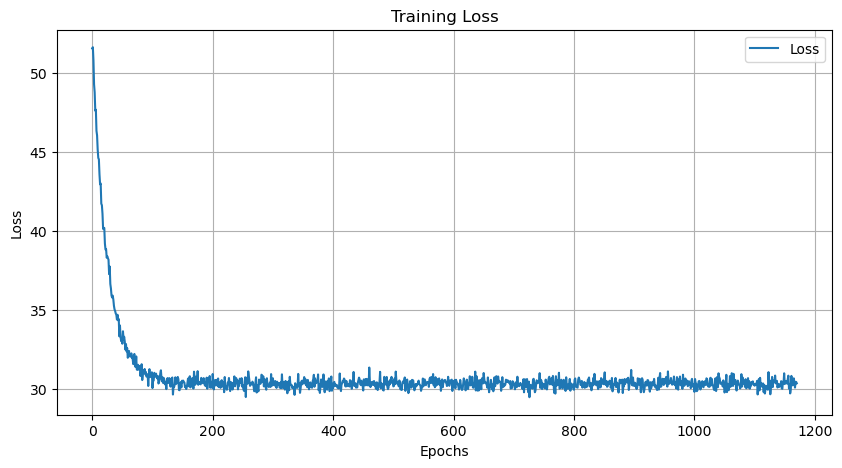

: 

In [6]:

net = nn.Sequential(nn.Linear(feature_size, 1))
criterion = nn.MSELoss()
optim =  torch.optim.SGD(net.parameters(), lr=lr)
report_every = 100
losses = []
train_dl = DataLoader(TensorDataset(X[:, :-1], y), batch_size=batch_size)
step = 0

for epo in range(train_epoch):
    for xb, yb in train_dl:
        optim.zero_grad()
        loss = criterion(net(xb), yb)
        loss.backward()
        optim.step()
        cumloss += loss.detach()
        step += 1
        if step % report_every == 0:
            cumloss /= report_every
            print(f"step = {step}, loss = {cumloss.item()}")
            losses.append(cumloss.item())
print(f"diff {w - wstar}, total loss {loss_func(w, X, y)}")

plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
